In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [235]:
Datos=pd.DataFrame(pd.read_csv("Employee-Attrition.csv"))

In [236]:
Datos

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [237]:
Datos.isna().sum() #Verificar valores incompletos

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [238]:
Datos.dtypes # ver los tipos de datos en el dataframe

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Convertir nuestra variable a predercir a una de tipo numérico

In [239]:
Datos['Attrition'].replace({'Yes':'1', 'No':'0'}, inplace=True)
Datos['Attrition'] = pd.to_numeric(Datos['Attrition']) 

In [240]:
Datos

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## ALGUNAS GRAFICAS PARA ENTENDER EL NEGOCIO

### ¿Que tanto viajan los empleados?

(array([0, 1, 2]),
 [Text(0, 0, 'Travel_Rarely'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Non-Travel')])

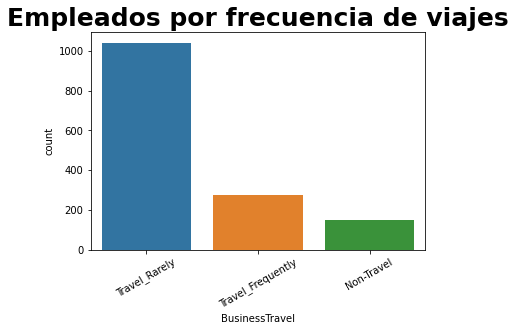

In [241]:
sns.countplot(x='BusinessTravel',data=Datos)
plt.title('Empleados por frecuencia de viajes', weight='bold', size=25, y=1)
#plt.gcf().set_size_inches(10, 5)
plt.xticks(rotation=30)

### ¿Que edad tienen los empleados?

(array([10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

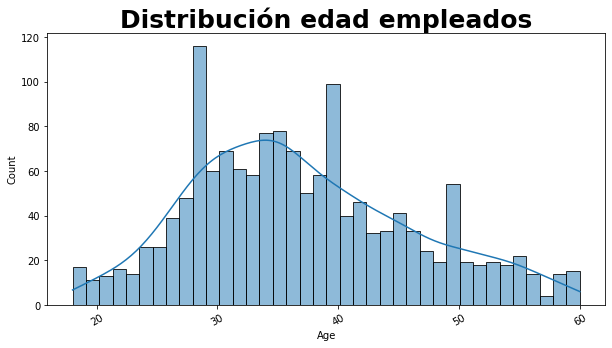

In [242]:

sns.histplot(x='Age', kde=True, data=Datos, bins=int(np.sqrt(Datos['Age'].count())))
plt.title('Distribución edad empleados', weight='bold', size=25, y=1)
plt.gcf().set_size_inches(10, 5)
plt.xticks(rotation=30)

### Por áreas ¿Como estan distribuidos los empleados? 

Text(0.5, 1, '% Empleados por Departamnto')

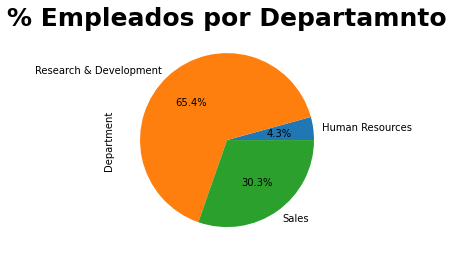

In [243]:
data_pie= Datos.groupby("Department")['Department'].count()
data_pie
data_pie.plot.pie(autopct="%.1f%%");
plt.title('% Empleados por Departamnto', weight='bold', size=25, y=1)

### ¿Que formación tienen los empleados?

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

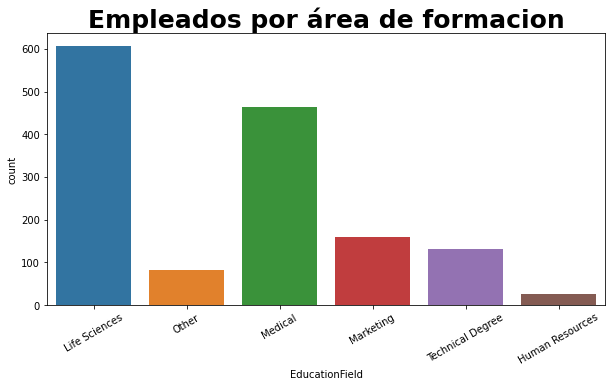

In [244]:
sns.countplot(x='EducationField',data=Datos)
plt.title('Empleados por área de formacion', weight='bold', size=25, y=1)
plt.gcf().set_size_inches(10, 5)
plt.xticks(rotation=30)

### ¿Cuantos años llevan trabajando los empleados?

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

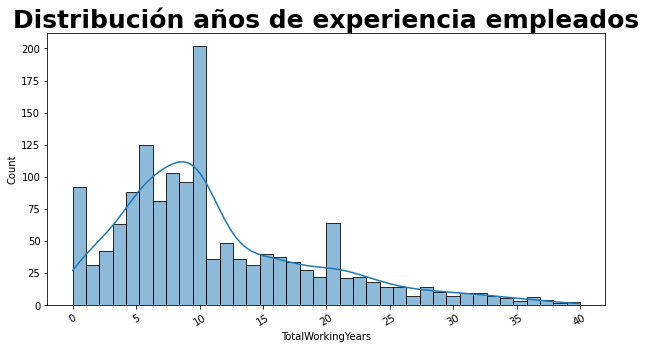

In [245]:


sns.histplot(x='TotalWorkingYears', kde=True, data=Datos, bins=int(np.sqrt(Datos['TotalWorkingYears'].count())))
plt.title('Distribución años de experiencia empleados', weight='bold', size=25, y=1)
plt.gcf().set_size_inches(10, 5)
plt.xticks(rotation=30)

## Separamos varialbes numericas para hacer analisis de correlaciones

In [246]:
Numeric_data=pd.DataFrame(Datos.select_dtypes(include=['int64']))
Numeric_data #visualizacion de variables numéricas

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,1,2062,4,42,2,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,1,2064,2,87,4,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,1,2065,4,63,2,...,4,80,0,17,3,2,9,6,0,8


In [247]:
Numeric_data.corr().dtypes


Age                         float64
Attrition                   float64
DailyRate                   float64
DistanceFromHome            float64
Education                   float64
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobSatisfaction             float64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
YearsWithCurrManager        float64
dtype: object

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5]),
 [Text(0.5, 0, 'Age'),
  Text(2.5, 0, 'DailyRate'),
  Text(4.5, 0, 'Education'),
  Text(6.5, 0, 'EmployeeNumber'),
  Text(8.5, 0, 'HourlyRate'),
  Text(10.5, 0, 'JobLevel'),
  Text(12.5, 0, 'MonthlyIncome'),
  Text(14.5, 0, 'NumCompaniesWorked'),
  Text(16.5, 0, 'PerformanceRating'),
  Text(18.5, 0, 'StandardHours'),
  Text(20.5, 0, 'TotalWorkingYears'),
  Text(22.5, 0, 'WorkLifeBalance'),
  Text(24.5, 0, 'YearsInCurrentRole'),
  Text(26.5, 0, 'YearsWithCurrManager')])

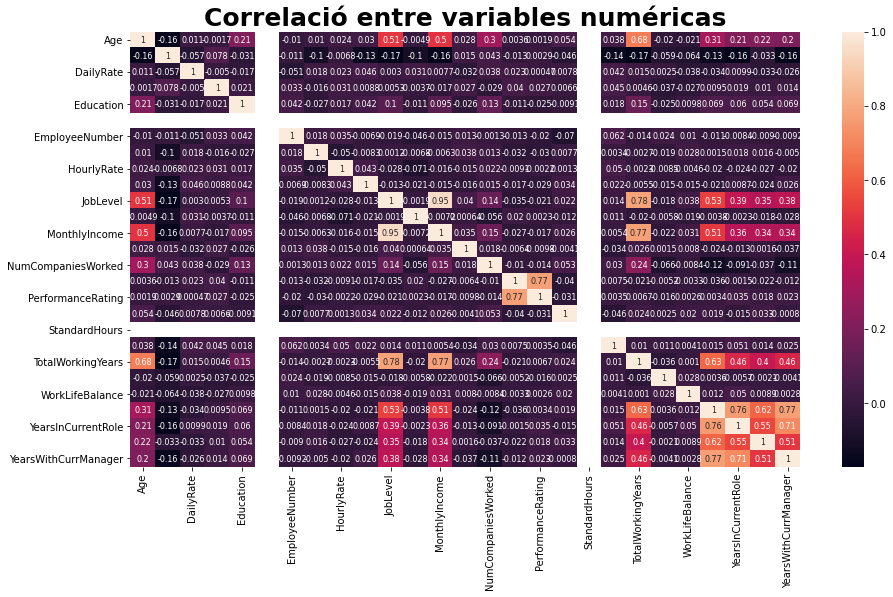

In [248]:
sns.heatmap(Numeric_data.corr(), annot=True, annot_kws={"size":8})
plt.title('Correlació entre variables numéricas', weight='bold', size=25, y=1)
plt.gcf().set_size_inches(15, 8)
plt.xticks(rotation=90)

### Crear un listado de todas las correlaciones

In [249]:
corelation=Numeric_data.corr()
corr_pairs = corelation.unstack()
print(corr_pairs)

Age                   Age                        1.000000
                      Attrition                 -0.159205
                      DailyRate                  0.010661
                      DistanceFromHome          -0.001686
                      Education                  0.208034
                                                   ...   
YearsWithCurrManager  WorkLifeBalance            0.002759
                      YearsAtCompany             0.769212
                      YearsInCurrentRole         0.714365
                      YearsSinceLastPromotion    0.510224
                      YearsWithCurrManager       1.000000
Length: 729, dtype: float64


### Ordenar los valores de correlaciones

In [250]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

TotalWorkingYears        Attrition            -0.171063
Attrition                TotalWorkingYears    -0.171063
JobLevel                 Attrition            -0.169105
Attrition                JobLevel             -0.169105
                         YearsInCurrentRole   -0.160545
                                                 ...   
YearsInCurrentRole       StandardHours              NaN
YearsSinceLastPromotion  EmployeeCount              NaN
                         StandardHours              NaN
YearsWithCurrManager     EmployeeCount              NaN
                         StandardHours              NaN
Length: 729, dtype: float64


### Seleccionar las correlaciones más fuertes (Mayores a 60%)

In [251]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.6]
print(strong_pairs[[0,2,4,6,8,10,12,14,16,18]])

YearsSinceLastPromotion  YearsAtCompany          0.618409
YearsAtCompany           TotalWorkingYears       0.628133
Age                      TotalWorkingYears       0.680381
YearsWithCurrManager     YearsInCurrentRole      0.714365
YearsInCurrentRole       YearsAtCompany          0.758754
YearsAtCompany           YearsWithCurrManager    0.769212
TotalWorkingYears        MonthlyIncome           0.772893
PerformanceRating        PercentSalaryHike       0.773550
JobLevel                 TotalWorkingYears       0.782208
MonthlyIncome            JobLevel                0.950300
dtype: float64


### Crear una matriz con las columnas que poseen las correlaciones mas fuertes

In [252]:
Datos_para_analisis=Numeric_data[['YearsAtCompany', 'TotalWorkingYears', 
                                  'YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager', 
                                 'MonthlyIncome', 'PercentSalaryHike', 'JobLevel', 'PerformanceRating',
                                 'YearsSinceLastPromotion', 'Age']]

In [253]:
Datos_para_analisis

,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole,YearsAtCompany,YearsWithCurrManager,MonthlyIncome,PercentSalaryHike,JobLevel,PerformanceRating,YearsSinceLastPromotion,Age
0,6,8,4,6,5,5993,11,2,3,0,41
1,10,10,7,10,7,5130,23,2,4,1,49
2,0,7,0,0,0,2090,15,1,3,0,37
3,8,8,7,8,0,2909,11,1,3,3,33
4,2,6,2,2,2,3468,12,1,3,2,27
...,...,...,...,...,...,...,...,...,...,...,...
1465,5,17,2,5,3,2571,17,2,3,0,36
1466,7,9,7,7,7,9991,15,3,3,1,39
1467,6,6,2,6,3,6142,20,2,4,0,27
1468,9,17,6,9,8,5390,14,2,3,0,49


### Añadir la variable a predecir a nuestra matriz (En este caso "Attrition")

In [254]:
Datos_para_analisis= Datos_para_analisis.assign(Attrition=Numeric_data['Attrition'].values)

In [255]:
Datos_para_analisis

,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole,YearsAtCompany,YearsWithCurrManager,MonthlyIncome,PercentSalaryHike,JobLevel,PerformanceRating,YearsSinceLastPromotion,Age,Attrition
0,6,8,4,6,5,5993,11,2,3,0,41,1
1,10,10,7,10,7,5130,23,2,4,1,49,0
2,0,7,0,0,0,2090,15,1,3,0,37,1
3,8,8,7,8,0,2909,11,1,3,3,33,0
4,2,6,2,2,2,3468,12,1,3,2,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,5,17,2,5,3,2571,17,2,3,0,36,0
1466,7,9,7,7,7,9991,15,3,3,1,39,0
1467,6,6,2,6,3,6142,20,2,4,0,27,0
1468,9,17,6,9,8,5390,14,2,3,0,49,0


# Probaremos diferentes modelos de predicción

### Regresión logística

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [257]:
X = np.array(Datos_para_analisis.drop(['Attrition'],1))
y = np.array(Datos_para_analisis['Attrition'])

In [258]:
print(X.shape)
print(y.shape)
y

(1470, 11)
(1470,)


array([1, 0, 1, ..., 0, 0, 0])

In [259]:


classifier = LogisticRegression()
classifier.fit(X, y)
predictions = classifier.predict(X)

print('Número de instancias a predecir: {}'.format(y.shape[0]))
print('Valores de verdad: {}'.format(y))
print('Valores predichos: {}'.format(predictions))



Número de instancias a predecir: 1470
Valores de verdad: [1 0 1 ... 0 0 0]
Valores predichos: [0 0 0 ... 0 0 0]


In [260]:
classifier.score(X, y)

0.8387755102040816

In [261]:
prediction = classifier.predict(X)
cnf_matrix = confusion_matrix(y, prediction)
print(cnf_matrix)


[[1233    0]
 [ 237    0]]


### Naive Bayes

In [262]:
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()
classifier2.fit(X, y);

prediction2 = classifier2.predict(X)
cnf_matrix2 = confusion_matrix(y, prediction2)

classifier2.score(X, y)

0.6707482993197279

In [263]:
prediction2 = classifier2.predict(X)
cnf_matrix2 = confusion_matrix(y, prediction2)
print(cnf_matrix2)

[[848 385]
 [ 99 138]]


### Custering por K- Means

In [264]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from IPython.display import HTML
from sklearn.metrics import silhouette_score

In [265]:
n_clusters = 3

In [266]:
km = KMeans( n_clusters = n_clusters)
km.fit(X)
y = km.predict(X)

In [267]:
def experiment_number_of_clusters(X, clustering, show_metric=True,
                                  plot_data=True, plot_centers=True, plot_boundaries=False):
    plt.figure(figsize=(15,6))
    for n_clusters in range(2,10):
        clustering.n_clusters = n_clusters
        y = clustering.fit_predict(X)

        cm = plt.cm.plasma
        plt.subplot(2,4,n_clusters-1)

        plot_cluster_predictions(clustering, X, n_clusters, cm, 
                                 plot_data, plot_centers, show_metric)
        

def plot_cluster_predictions(clustering, X, n_clusters = None, cmap = plt.cm.plasma,
                             plot_data=True, plot_centers=True, show_metric=False,
                             title_str=""):

    assert not hasattr(clustering, "n_clusters") or \
           (hasattr(clustering, "n_clusters") and n_clusters is not None), "must specify `n_clusters` for "+str(clustering)

    if n_clusters is not None:
        clustering.n_clusters = n_clusters

    y = clustering.fit_predict(X)
    # remove elements tagged as noise (cluster nb<0)
    X = X[y>=0]
    y = y[y>=0]

    if n_clusters is None:
        n_clusters = len(np.unique(y))

    if plot_data:        
        plt.scatter(X[:,0], X[:,1], color=cmap((y*255./(n_clusters-1)).astype(int)), alpha=.5)
    if plot_centers and hasattr(clustering, "cluster_centers_"):
        plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=150,  lw=3,
                    facecolor=cmap((np.arange(n_clusters)*255./(n_clusters-1)).astype(int)),
                    edgecolor="black")   

    if show_metric:
        if hasattr(clustering, 'inertia_'):
          inertia = clustering.inertia_
        else:
          inertia = 0
        sc = silhouette_score(X, y) if len(np.unique(y))>1 else 0
        plt.title("n_clusters %d, inertia=%.0f sc=%.3f"%(n_clusters, inertia, sc)+title_str)
    else:
        plt.title("n_clusters %d"%n_clusters+title_str)

    plt.axis("off")
    return

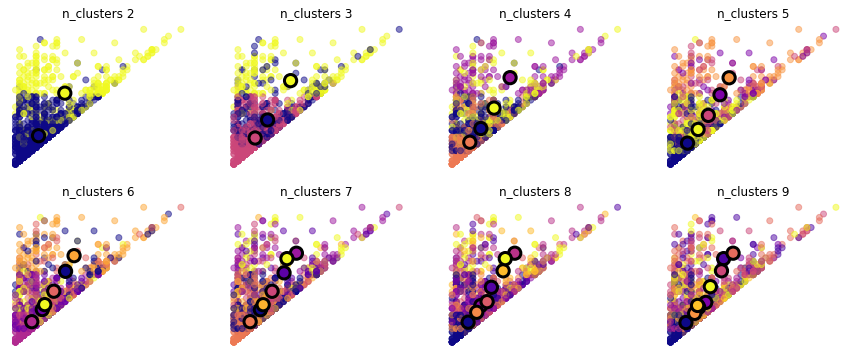

In [268]:
experiment_number_of_clusters(X, KMeans(), show_metric=False)

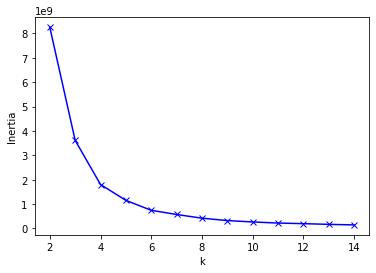

In [269]:
#X,_ = make_blobs(5000, cluster_std=1.5, centers=6, random_state=10)

Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import train_test_split

In [271]:
X = np.array(Datos_para_analisis.drop(['Attrition'],1))
y = np.array(Datos_para_analisis['Attrition'])

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
y

(1102, 11)
(1102,)


array([1, 0, 1, ..., 0, 0, 0])

In [273]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
rfc_pred = model_rf.predict(X_test)
rfc_pred
model_rf.score(X_test, y_test)

0.8342391304347826

In [274]:
y_pred_rf = model_rf.predict(X_test)
false_positive_rate_rf, true_positive_rate_rf, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)
roc_auc_rf

0.50625

In [275]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
print('Confusion Matrix : \n', cm_rf)

total1=sum(sum(cm_rf))
#####from confusion matrix calculate accuracy
accuracy1=(cm_rf[0,0]+cm_rf[1,1])/total1
print ('Accuracy RF : ', accuracy1)

sensitivity1 = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[0,1])
print('Sensitivity RF: ', sensitivity1 )

specificity1 = cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])
print('Specificity RF: ', specificity1)

Confusion Matrix : 
 [[304  16]
 [ 45   3]]
Accuracy RF :  0.8342391304347826
Sensitivity RF:  0.95
Specificity RF:  0.0625
